<a href="https://colab.research.google.com/github/jasonhua805/UltimateIncDSChallenge/blob/main/Part_3_Ultimate_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
df = pd.read_json('ultimate_data_challenge.json')
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


# **Data Cleaning**

In [76]:
#First let's get an overview of the data before we begin cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [77]:
#Step 1: Let's convert the signup date and last trip date columns to datetime values instead of strings like they are currently.
df['signup_date'] = pd.to_datetime(df['signup_date'],format='%Y-%m-%d')
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'],format='%Y-%m-%d')

Now let's address the missing values. Two of the columns which have missing values are quantitative variables (Average User Rating and Average Driver Rating). For these two columns, we will impute the average for missing values. The last columnn with missing values is "phone type" which is a categorical variable. Because there are only a few missing values here, we will go ahead and delete these entries which will bring our total dataset down to 49,604 users.

In [78]:
#We drop the rows with missing values in the phone type feature column
df = df[df['phone'].notna()]

For imputing averages, we want to consider whether we should take the mean or the median. If our data is skewed, it's typically more robust to impute the median. Let's check now to see.

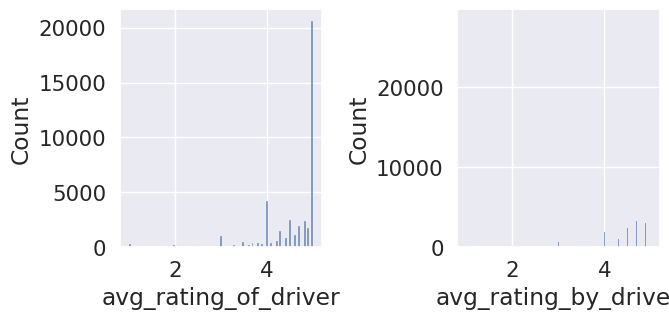

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(df['avg_rating_of_driver'],ax=axes[0])
sns.histplot(df['avg_rating_by_driver'],ax=axes[1])
plt.show();

Both of these distributions are heavily skewed left. Therefore we'll impute the median for missing values on both features.

In [80]:
df = df.fillna(df.median())
df.reset_index(inplace=True,drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

The next thing we need to note is whether or not a user is considered "active". By the definition provided in the challenge ruleset, an "active" user is one who has ordered a ride in the preceding 30 days. Now given that there is not a specified date provided, we will assume that the last date on the dataset represents the current day and we will mark every single user that has a "last trip date" at least within 30 days of the current day.

In [81]:
#The most recent date available is July 1, 2014. Therefore, any user who has a last trip date on or after June 1, 2014 will be considered to be active.
df.sort_values('last_trip_date',ascending=False)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6297,King's Landing,0,2014-01-04,3.8,1.09,2014-07-01,iPhone,11.8,False,64.7,3.51,4.5
9417,Astapor,0,2014-01-19,4.7,1.38,2014-07-01,iPhone,50.0,False,50.0,5.00,5.0
36745,Winterfell,1,2014-01-05,3.5,1.36,2014-07-01,iPhone,44.4,True,55.6,5.56,4.9
9365,Astapor,0,2014-01-27,5.0,1.00,2014-07-01,Android,0.0,False,100.0,1.39,5.0
42027,Winterfell,5,2014-01-28,5.0,1.00,2014-07-01,iPhone,0.0,False,75.0,6.19,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
16256,Winterfell,1,2014-01-01,5.0,1.00,2014-01-01,Android,0.0,True,100.0,2.43,5.0
35894,Winterfell,1,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,6.27,5.0
35336,Winterfell,1,2014-01-01,1.0,1.00,2014-01-01,iPhone,0.0,True,100.0,17.97,5.0
7094,Astapor,1,2014-01-01,4.9,1.00,2014-01-01,Android,0.0,True,100.0,12.56,2.0


In [82]:
import datetime
active = []
for date in df['last_trip_date']:
  if date >= datetime.date(2014,6,1):
    active.append(1)
  else:
    active.append(0)
df['active_user'] = active

In [83]:
#We create two subsets of the dataframe based on whether the user is active or not.
df_active = df[df['active_user']==1]
df_inactive = df[df['active_user']==0]

df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18671 entries, 0 to 49599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    18671 non-null  object        
 1   trips_in_first_30_days  18671 non-null  int64         
 2   signup_date             18671 non-null  datetime64[ns]
 3   avg_rating_of_driver    18671 non-null  float64       
 4   avg_surge               18671 non-null  float64       
 5   last_trip_date          18671 non-null  datetime64[ns]
 6   phone                   18671 non-null  object        
 7   surge_pct               18671 non-null  float64       
 8   ultimate_black_user     18671 non-null  bool          
 9   weekday_pct             18671 non-null  float64       
 10  avg_dist                18671 non-null  float64       
 11  avg_rating_by_driver    18671 non-null  float64       
 12  active_user             18671 non-null  int64 

**The fraction of observed users who were retained is 18,671 Active Users/ 50,000 Total Users = 37.3%**

# **Exploratory Data Analysis**

Let's first try to see if there's noticeable differences between iPhone or Android users.

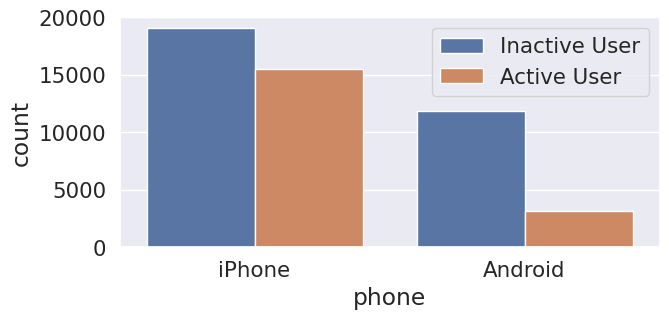

In [84]:
#We'll make an adjusted copy of our dataframe to show our visualizations on (removing outliers in order to make the visualizations more aesthetic and digestible)
df_adj = df.copy(deep=True)

df_iphone = df_adj[df_adj['phone']=='iPhone']
df_android = df_adj[df_adj['phone']=='Android']

sns.countplot(x='phone',hue='active_user',data=df_adj)
plt.legend(labels=['Inactive User','Active User'],loc='upper right')
plt.show();

**It appears that iPhone users are far more likely to be retained as active users compared to Android users.**

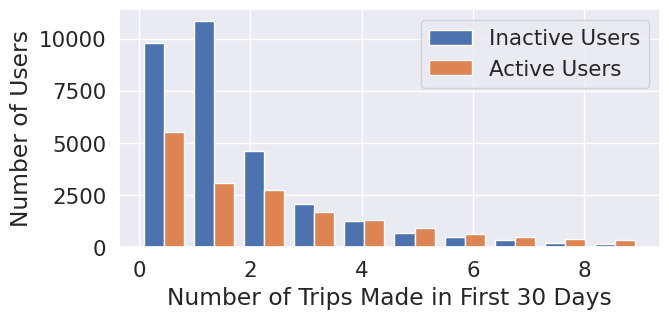

In [85]:
#We'll make an adjusted copy of our dataframe to show our visualizations on (removing outliers in order to make the visualizations more aesthetic and digestible)
df_adj = df.copy(deep=True)
df_adj['trips_in_first_30_days'] = df_adj['trips_in_first_30_days'][df_adj['trips_in_first_30_days'].between(df_adj['trips_in_first_30_days'].quantile(.05),df_adj['trips_in_first_30_days'].quantile(.95))]
df_adj['avg_dist'] = df_adj['avg_dist'][df_adj['avg_dist'].between(df_adj['avg_dist'].quantile(.05),df_adj['avg_dist'].quantile(.95))]
df_adj['surge_pct'] = df_adj['surge_pct'][df_adj['surge_pct'].between(df_adj['surge_pct'].quantile(.20),df_adj['surge_pct'].quantile(.80))]

#We again make two subsets of this adjusted dataframe based on whether the user is active or not.
df_active_adj = df_adj[df_adj['active_user']==1]
df_inactive_adj = df_adj[df_adj['active_user']==0]

plt.hist([df_inactive_adj['trips_in_first_30_days'],df_active_adj['trips_in_first_30_days']],label=['Inactive Users','Active Users'])
plt.legend(loc='upper right')
plt.xlabel('Number of Trips Made in First 30 Days')
plt.ylabel('Number of Users')
plt.show();

We notice that while both distributions skew right, there are more active users who made multiple trips in the first 30 days compared to inactive users where the bulk of them lie in either making 0 trips or just 1 trip in the first 30 days

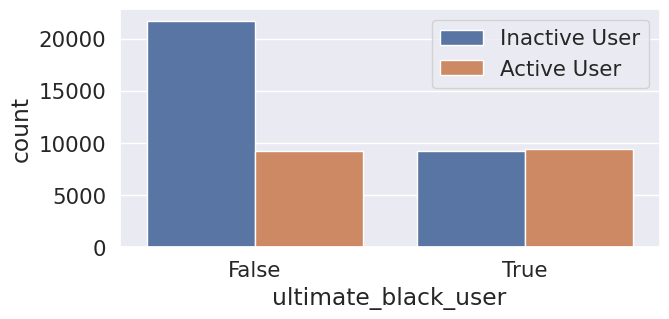

In [86]:
#Finally, let's take a look at how user activity with the Ultimate Black product affected their retainage
sns.countplot(x='ultimate_black_user',hue='active_user',data=df_adj)
plt.legend(labels=['Inactive User','Active User'],loc='upper right')
plt.show();

In [87]:
df_active['ultimate_black_user'].value_counts()

True     9410
False    9261
Name: ultimate_black_user, dtype: int64

In [88]:
df_adj['ultimate_black_user'].value_counts()

False    30992
True     18612
Name: ultimate_black_user, dtype: int64

There are about an equal number of active users who tried Ultimate Black as active users who did not. However, there are almost twice as many inactive users who did NOT try Ultimate Black compared to inactive users who did. Using Bayes theorem, this means that the probability that a user is retained given that they try Ultimate Black is approximately (0.504)*(.373)/(.375) = 50.2%

**In other words, any user who tries Ultimate Black within their first 30 days after registering has a 50% chance of becoming an active user.**

Next, let's look at the distribution of active users by city.

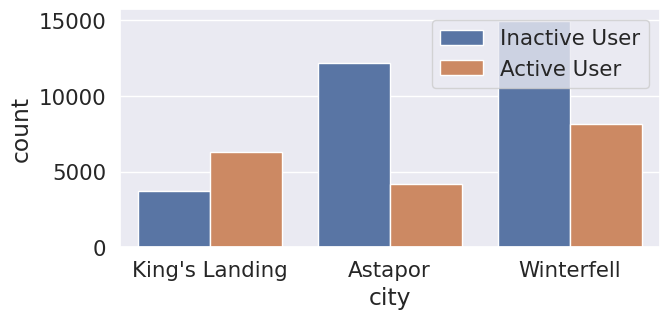

In [89]:
sns.countplot(x='city',hue='active_user',data=df_adj)
plt.legend(labels=['Inactive User','Active User'],loc='upper right')
plt.show();

**King's Landing residents appear to be the most likely to become active users while users in Astapor are the opposite.**

Finally, let's take a look at how surge pricing appears to influence our user retention.

<Axes: xlabel='active_user', ylabel='surge_pct'>

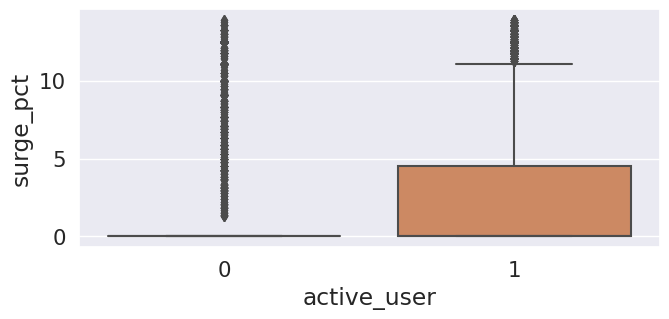

In [90]:
sns.boxplot(x='active_user',y='surge_pct',data=df_adj)

Notice how active users have a higher propotion of rides being taken during surge pricing whereas most inactive users save for outliers almost never used the service whenever surge pricing was active.

# **Predictive Modeling**

**Data Preprocessing**

In [91]:
from sklearn.model_selection import train_test_split

#First, let's convert our categorical variables into quantitative ones with get dummies.
df = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])

X = df.drop(columns= 'active_user')
y = df['active_user']

#Next, let's sample an equal proportion of both positive and negative cases so our model can fairly learn between the two cases.
inactive = y[y.eq(0)==True]
active = y[y.eq(1)==True]
inactive_sample = inactive.sample(n=18671,random_state = 42)
X2_inactive = X.iloc[inactive_sample.index]
X2_active = X.iloc[active.index]
X2 = X2_inactive.append(X2_active)
y2 = inactive.append(active)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

**Weight of Evidence/Information Value**

The code below defines functions for determining the information value of each feature column. We want to remove any feature which have an IV < 0.01 or IV > 0.8

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import traceback
import re
import pandas.core.algorithms as algos
import warnings
warnings.filterwarnings("ignore")
from pandas import Series
from datetime import datetime
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
            
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [93]:
final_iv, IV = data_vars(X_train,y_train)
IV.sort_values(by='IV',ascending=False)

,VAR_NAME,IV
11,surge_pct,0.338433
3,avg_surge,0.337496
5,city_King's Landing,0.282163
8,phone_Android,0.249914
9,phone_iPhone,0.249914
12,trips_in_first_30_days,0.232337
13,ultimate_black_user_False,0.187317
14,ultimate_black_user_True,0.187317
4,city_Astapor,0.139346
2,avg_rating_of_driver,0.062547


In [94]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(39683, 12)

,avg_rating_of_driver,avg_surge,city_Astapor,city_King's Landing,phone_Android,phone_iPhone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user_False,ultimate_black_user_True,weekday_pct
19499,5.0,1.0,1,0,1,0,2014-01-31,0.0,5,0,1,0.0
22204,5.0,1.0,0,0,0,1,2014-01-17,0.0,3,1,0,66.7
23045,4.0,1.0,1,0,1,0,2014-01-27,0.0,1,1,0,100.0
7732,4.0,1.0,0,0,0,1,2014-01-09,0.0,7,0,1,75.0
13926,4.9,1.0,0,1,1,0,2014-01-18,0.0,0,1,0,100.0


We also want to remove any features which have high variance inflation factor because that indicates there is collinearity between these features which we would want to remove.

In [95]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing phone_Android with VIF of inf
Iteration # 2
Removing ultimate_black_user_False with VIF of 80.853185
Iteration # 3
Removing avg_surge with VIF of 36.257544
Iteration # 4
Removing avg_rating_of_driver with VIF of 7.204915
Iteration # 5
Complete


In [96]:
#Last step: Let's trim our data for outliers like we did earlier in our EDA visualizations.
final_df = final_df[(np.abs(stats.zscore(final_df)) < 2.5).all(axis=1)]

#Now let's adjust our training and test data to reflect our preprocessing.
X_train = X_train[final_df.columns]
X_test = X_test[final_df.columns]

# **Modeling**

Now it's time to begin our modeling. For this problem, I've chosen to use an XG Boost model because of its high flexibility and accuracy for dealing with classification problems. The alternative consideration is a random forest model which is also highly popular and effective for dealing with this type of problem, but because RF's are more likely to overfit than XGBoost, the nod was given to XGBoost. Note however that should this model be expanded to a larger dataset that would require using a distributed computing setup, then Random Forest would be easier to implement for this scenario.

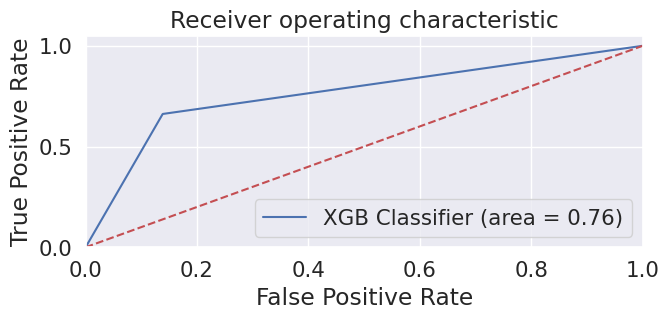

XG Boost: Accuracy=0.787
XG Boost: f1-score=0.784
XG Boost: ROC Score=0.762


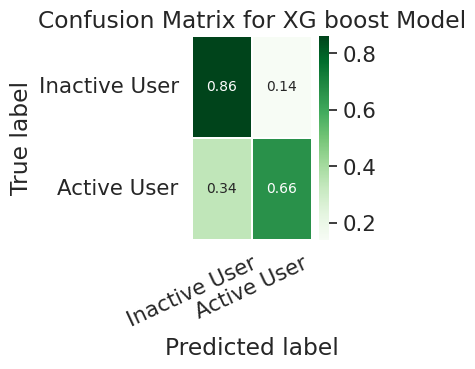

In [97]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
xgb = XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='auc')
xgb_model = xgb.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

ac_xgb = accuracy_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred, average='weighted')
cm_xgb = confusion_matrix(y_test, y_pred)
roc_xgb = roc_auc_score(y_test, y_pred)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % roc_xgb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('XG Boost: Accuracy=%.3f' % (ac_xgb))
print('XG Boost: f1-score=%.3f' % (f1_xgb))
print('XG Boost: ROC Score=%.3f' % (roc_xgb))

cm_xgb = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(cm_xgb, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Inactive User', 'Active User']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XG boost Model')
plt.show()

In [98]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

Our model performs decently well! It has a 79% accuracy rate and an overall ROC score of 76%. However, where the model has a clear area of improvement is in its recall which only scored 66%. In context though, it may be better that this model is overly conservative and is better at predicting true negatives (inactive users) instead of vice versa in which it would predict a lot of false positives which could mislead Ultimate to assume that its initiatives based on the results of this model will produce more active users when that is actually not the case.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


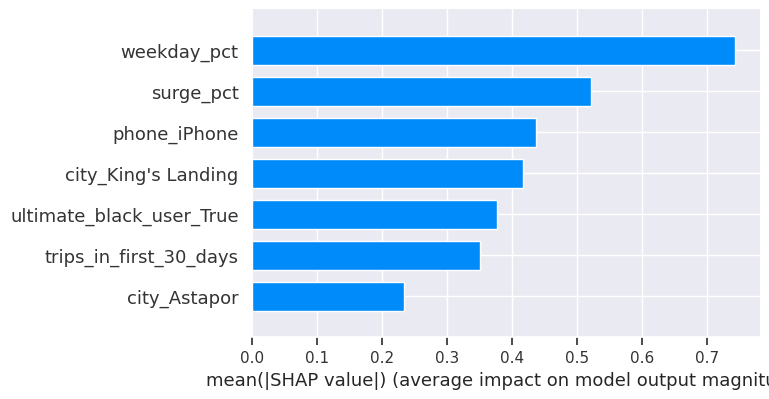

In [99]:
!pip install shap
import shap
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

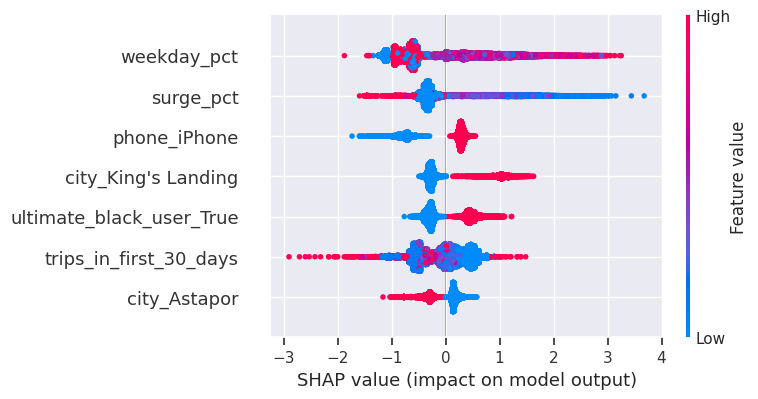

In [100]:
shap.summary_plot(shap_values, X_train)

Finally, let's look at our SHAP analysis which reveals some interesting insights for Ultimate. Some of these can be summarized as follows:
1. The most impactful feature in our model was the percentage of rides that the user took on weekdays. Generally speaking, high weekday users tend to be more likely to be active although note that this is definitely not a "hard" correlation.
2. Users who had a high percentage of their rides be under surge pricing were more likely to end up becoming inactive users.
3. A user who used Ultimate Black was far more likely to have been predicted as being an active user.
4. Users in King's Landing were more likely to be active users. Users in Astapor were more likely to be inactive users.
5. iPhone users are more likely to be active users.

# Final Recommendation

Overall - the recommendation for the Ultimate management team is to focus on **improving the user experience for Android users**, target user feedback in Astapor to find out why the locals in that city appear to be more inactive, and then **institute a trial program for new users to try Ultimate Black for free to entice them to become active users.**